###**Instrucciones**

**Continuar desde la Parte III**

Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

**Análisis Descriptivo y Visualización**

- Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
- Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
- Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
- Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
- Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

**Generar un Pull Request en GitHub**

- Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub y genera un Pull Request (PR) para revisión.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/BBDD_Bootcamp_DataScience_Skillnest/retail_sales_dataset.csv"
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#Limpiar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [7]:
#Generar estadísticas descriptivas
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
#Columnas númericas de mi dataframe
print(df.select_dtypes(include='number'))

     transaction_id  age  quantity  price_per_unit  total_amount
0                 1   34         3              50           150
1                 2   26         2             500          1000
2                 3   50         1              30            30
3                 4   37         1             500           500
4                 5   30         2              50           100
..              ...  ...       ...             ...           ...
995             996   62         1              50            50
996             997   52         3              30            90
997             998   23         4              25           100
998             999   36         3              50           150
999            1000   47         4              30           120

[1000 rows x 5 columns]


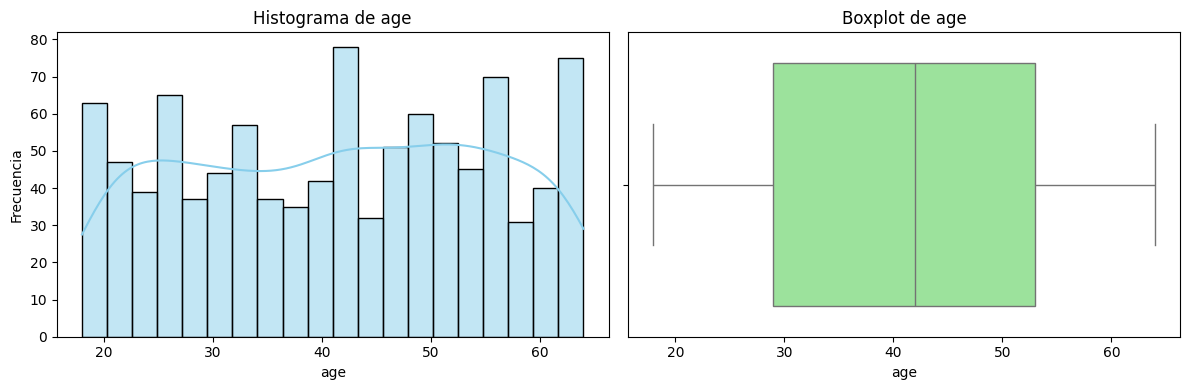

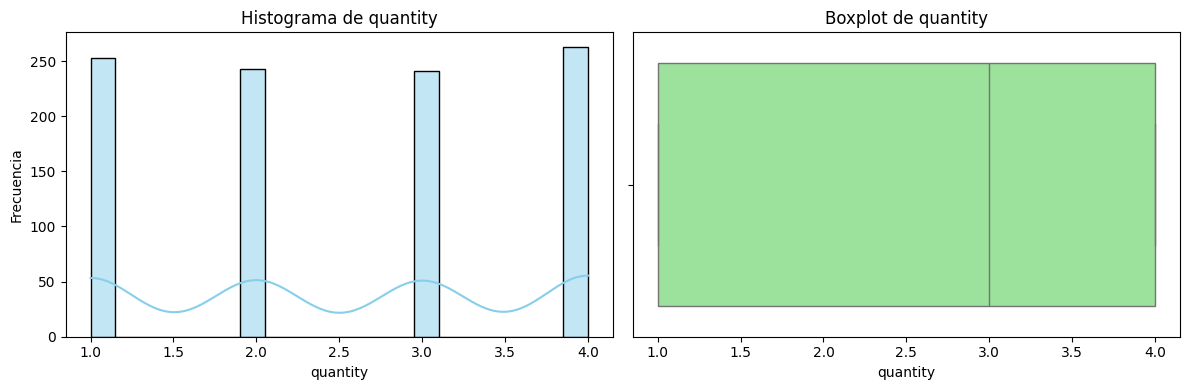

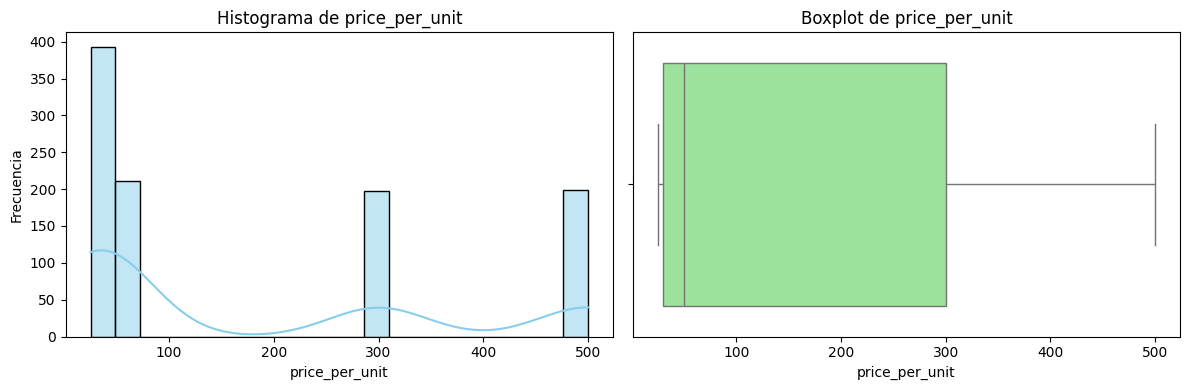

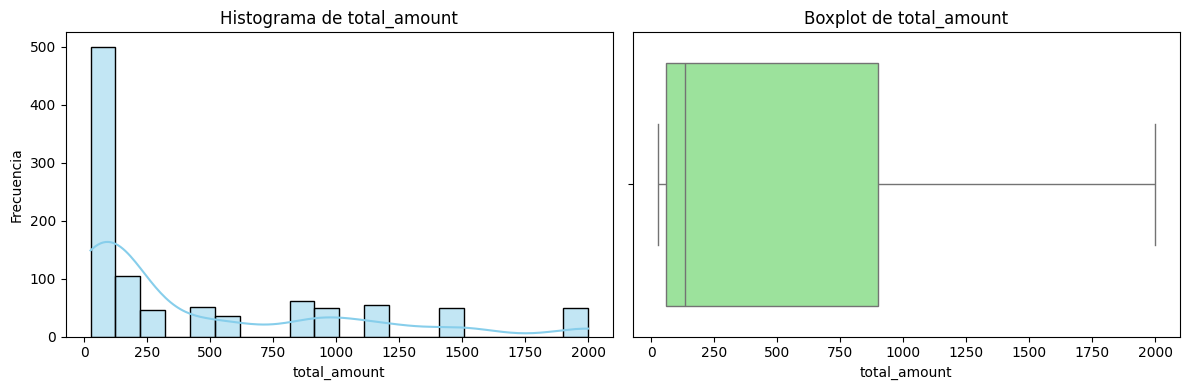

In [11]:
#Generar Histogramas y Boxplot de las variables cuantitativas
variables = ['age', 'quantity', 'price_per_unit', 'total_amount']

for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma con Seaborn
    sns.histplot(data=df, x=var, bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histograma de {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frecuencia')

    # Boxplot con Seaborn
    sns.boxplot(data=df, x=var, color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot de {var}')
    axes[1].set_xlabel(var)

    plt.tight_layout()
    plt.show()

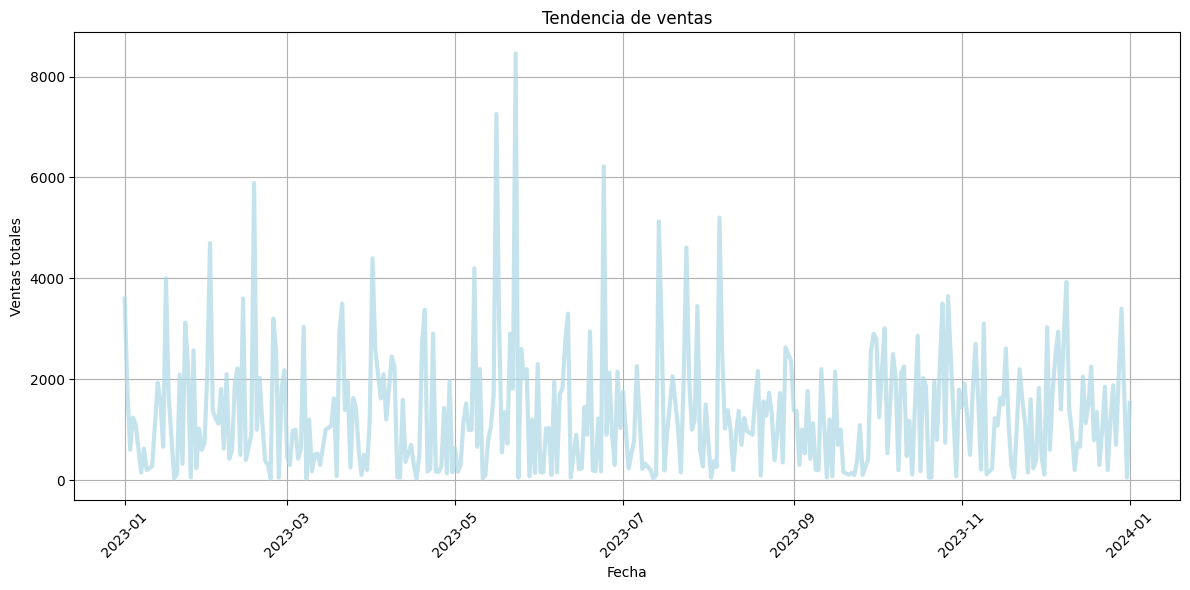

In [14]:
#Gráfica de lineas de las ventas a lo largo del tiempo
#Convertir fecha a datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar por fecha para que la línea sea correcta
df = df.sort_values('date')

# Agrupar ventas por fecha
ventas_diarias = df.groupby('date')['total_amount'].sum()

plt.figure(figsize=(12,6))
plt.plot(ventas_diarias.index, ventas_diarias.values,
         color='#ADD8E6', linewidth=3, alpha=0.7, linestyle='-')  # línea gruesa y pastel
plt.title('Tendencia de ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

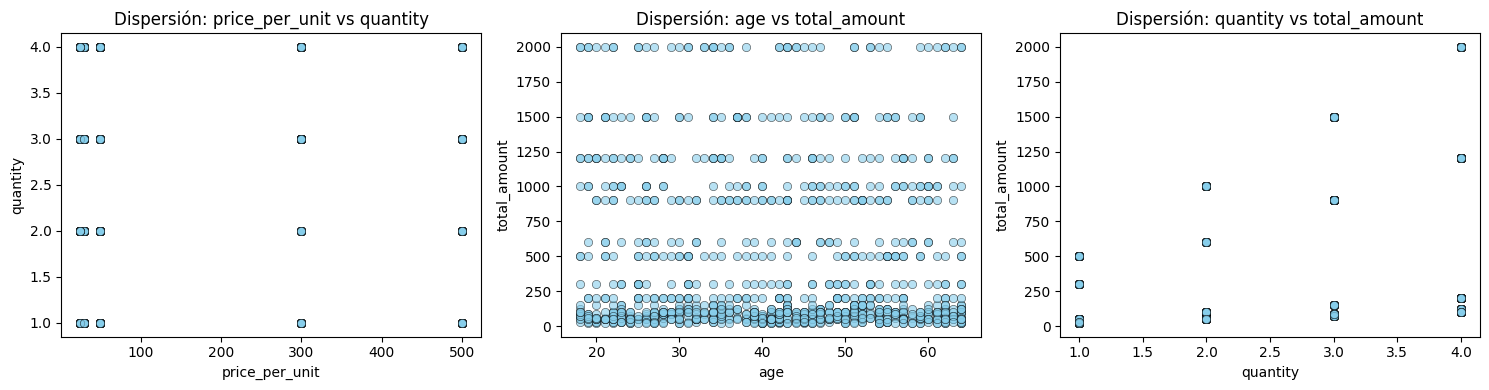

In [15]:
#Gráficas de dispersión para entender la relación entre distintas variables

variables = [
    ('price_per_unit', 'quantity'),
    ('age', 'total_amount'),
    ('quantity', 'total_amount')
]

plt.figure(figsize=(15, 4))

for i, (x_var, y_var) in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=x_var, y=y_var, alpha=0.6, color='skyblue', edgecolor='black')
    plt.title(f'Dispersión: {x_var} vs {y_var}')

plt.tight_layout()
plt.show()

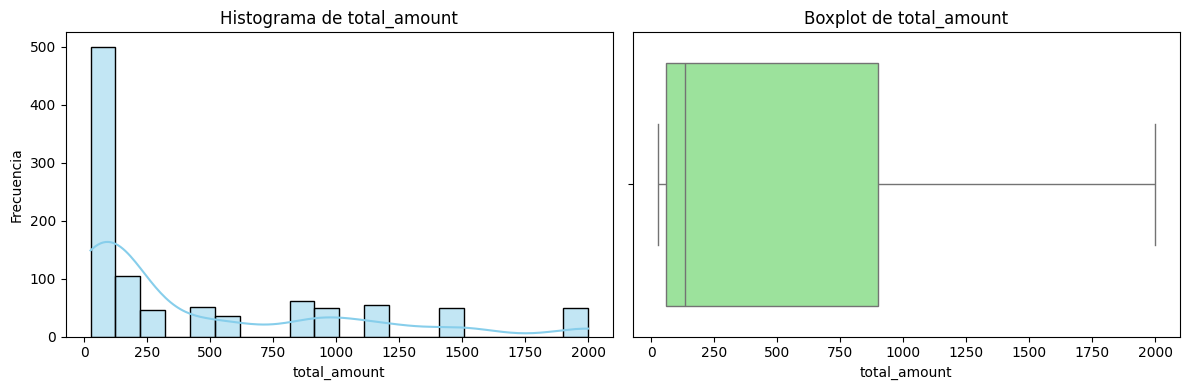

In [16]:
#Generar Histograma y Boxplot para analizar la distribución de las ventas
variables = ['total_amount']

for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma con Seaborn
    sns.histplot(data=df, x=var, bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histograma de {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frecuencia')

    # Boxplot con Seaborn
    sns.boxplot(data=df, x=var, color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot de {var}')
    axes[1].set_xlabel(var)

    plt.tight_layout()
    plt.show()

###**Conclusiones:**

-El promedio de edad de los compradores es de 41 años, y la mayoría de edades oscilan entre los 27 y 55 años.

-El promedio de precio por unidad es de 180, pero analizanzo el std nos dice que existe alta variabilidad en los datos respecto al promedio, lo que indica que o hay gran cantidad de clientes que compran a bajo o altos precios.

-Ambas variables (price_per_unit y total_amount) presentan valores atípicos y distribuciones sesgadas.
